In [27]:
using LinearAlgebra
t = 3.2
delta = 0.64
Ucf = 4.16
smalldelta = 0.01

0.01

In [28]:
using LinearAlgebra

In [29]:
Hg =  [
   0 t
   t delta ]

2×2 Matrix{Float64}:
 0.0  3.2
 3.2  0.64

In [30]:
Hf =  [
   0 t
   t delta - Ucf  ]

2×2 Matrix{Float64}:
 0.0   3.2
 3.2  -3.52

In [31]:
Eg,Vg = eigen(Hg)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -2.895960198758685
  3.535960198758685
vectors:
2×2 Matrix{Float64}:
 -0.741453  0.671005
  0.671005  0.741453

In [32]:
Ef,Vf = eigen(Hf)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -5.412067907364265
  1.892067907364265
vectors:
2×2 Matrix{Float64}:
 -0.50896  -0.86079
  0.86079  -0.50896

In [34]:
function F(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg,Vf)))^2)/(Eb+Eg-Ef+im*0.01)
end

F (generic function with 1 method)

In [36]:
fp = open("xpsoutput.dat","w")
for Eb in -10:0.001:10
    ints = (-1/pi)imag( F(Eg[1],Vg[1],Ef[1],Vf[1],Eb)+ F(Eg[1],Vg[1],Ef[2],Vf[2],Eb))
    println(fp,Eb,",",ints)
end
close(fp)

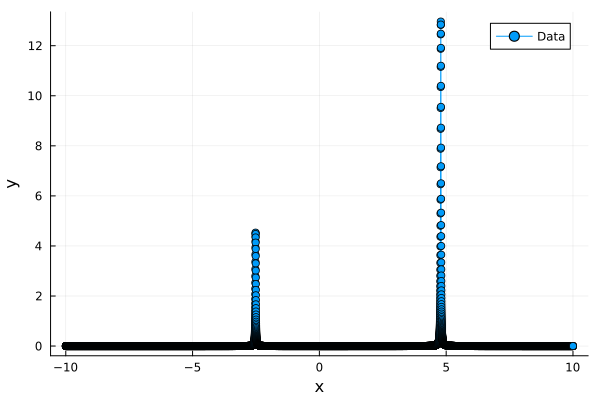

In [37]:
using Plots
using DelimitedFiles

# ファイルを読み取り
data = readdlm("xpsoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="x", ylabel="y", label="Data", marker=:circle)
